<a href="https://colab.research.google.com/github/Jbotey12/Estudio_ocupacion_B-B/blob/main/Preprocesamiento_B%26B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicción de ocupación de un B&B**

# 1. **Preprocesamiento**

El preprocesamiento de datos constituye una etapa fundamental en el desarrollo de cualquier modelo de predicción, ya que garantiza la calidad, coherencia y relevancia de la información utilizada. En el presente trabajo, el dataset inicial provenía de los registros de reservas del establecimiento objeto de estudio y se complementan con variables externas como condiciones meteorológicas, calendario de festivos, periodos vacacionales y eventos locales.

Sin embargo, estos datos en bruto presentaban limitaciones habituales en entornos reales, tales como valores nulos, incoherencias en los formatos, duplicidades y la necesidad de integrar información procedente de distintas fuentes. Para solventar estas cuestiones y asegurar un conjunto de datos fiable, se llevó a cabo un proceso de depuración, transformación y enriquecimiento de variables.

Este preprocesamiento no solo permitió disponer de un dataset limpio y estructurado, sino que también generó nuevas variables derivadas —como la antelación media de las reservas, la duración de las estancias o la tarifa estándar diaria— que aportan un valor añadido al análisis y contribuyen a mejorar la capacidad predictiva del modelo.

En las siguientes secciones se describen detalladamente las fases de este proceso, desde la unificación de los ficheros originales hasta la codificación final de las variables para su uso en algoritmos de aprendizaje automático.


In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import date
from datetime import datetime



In [2]:
# Cargar los datos (reservations.csv y clima_completo.csv)
from google.colab import files
uploaded = files.upload()

Saving clima_completo.csv to clima_completo.csv
Saving reservations(2021-2022).csv to reservations(2021-2022).csv
Saving reservations(2022-2023).csv to reservations(2022-2023).csv
Saving reservations(2023-2024).csv to reservations(2023-2024).csv
Saving reservations(2024-2025).csv to reservations(2024-2025).csv


In [3]:
df1 = pd.read_csv("reservations(2021-2022).csv") #del 30/03/2021 al 13/05/2022
df2 = pd.read_csv("reservations(2022-2023).csv") #del 14/05/2022 al 14/05/2023
df3 = pd.read_csv("reservations(2023-2024).csv") #del 15/05/2023 al 15/05/2024
df4 = pd.read_csv("reservations(2024-2025).csv") #del 16/05/2024 al 16/05/2025

In [4]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

Se utiliza el método df.info() junto con una visualización preliminar del conjunto de datos para evaluar su estructura y contenido. A partir de este análisis inicial, se identifican columnas con un elevado número de valores nulos, así como otras variables que no aportan información relevante para los objetivos del proyecto. En consecuencia, dichas columnas son eliminadas para simplificar el conjunto de datos y optimizar los procesos posteriores de análisis y modelado.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Referencia de la reserva                1528 non-null   object 
 1   Reservada                               1528 non-null   object 
 2   Nombre del alojamiento                  1528 non-null   object 
 3   Nombre del canal                        1528 non-null   object 
 4   Código promocional                      0 non-null      float64
 5   Nombre del huésped                      1528 non-null   object 
 6   Apellido del huésped                    1528 non-null   object 
 7   Correo electrónico del huésped          992 non-null    object 
 8   Teléfono del huésped                    1099 non-null   object 
 9   Compañía o empresa del huésped          96 non-null     object 
 10  Dirección del huésped                   967 non-null    obje

In [6]:
# Comprobar dimensiones y un vistazo rápido
print("Número total de reservas:", df.shape[0])
pd.set_option('display.max_columns', None)
#df.tail(10)

Número total de reservas: 1528


En la siguiente línea se analiza la columna correspondiente al descuento aplicado, verificando cuántos de sus valores son iguales a cero. Esta comprobación permite confirmar que ninguna reserva ha contado con algún tipo de descuento, por lo que se concluye que dicha columna no aporta información relevante al análisis y puede eliminarse. Este mismo criterio se ha aplicado para descartar otras columnas que presentaban valores constantes o carentes de utilidad para el objetivo del proyecto.

In [7]:
df[df['Descuento promocional'] == 0]['Descuento promocional'].count()



np.int64(1528)

In [8]:


columnas_a_eliminar = [
    'Código promocional', 'Notas', 'Newsletter solicitada',
    'Datos específicos del alojamiento', 'Referencia',
    'Descripción de la promoción','Número de factura','Total impuestos en porcentaje','Total impuestos fijos',
    'Introducir tarifas con tasas incluidas','¿Reserva con dispositivo móvil?',
    'Pago pendiente', 'Total pagos o depósitos procesados', 'Pago recibido', 'Descuento promocional',
    'Porcentaje del suplemento','Suplemento por tarjeta de crédito', 'Importe bebé extra',
    'Importe niño extra', 'Importe adulto extra' , 'Comentarios del huésped', 'Hora de llegada','Compañía o empresa del huésped',
    'Dirección del huésped línea 2', 'Provincia del huésped','Nombre del alojamiento', 'Correo electrónico del huésped',
     'Teléfono del huésped'
]

df = df.drop(columns=columnas_a_eliminar)


A continuación, se transforman las columnas que contienen información temporal al formato datetime, lo cual permite una manipulación más eficiente y precisa de los datos de fecha. Además, se genera una nueva columna que indica el día de la semana correspondiente a cada reserva. Esta variable adicional puede resultar útil para detectar patrones de comportamiento y analizar la ocupación en función del día de la semana, lo cual podría aportar valor al modelo predictivo.

In [9]:

df['Fecha de llegada'] = pd.to_datetime(df['Fecha de llegada'])
df['Fecha de salida'] = pd.to_datetime(df['Fecha de salida'])
df['Reservada'] = pd.to_datetime(df['Reservada'])
df['día_semana_llegada'] = df['Fecha de llegada'].dt.dayofweek #Columna dia de la semana


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Referencia de la reserva              1528 non-null   object        
 1   Reservada                             1528 non-null   datetime64[ns]
 2   Nombre del canal                      1528 non-null   object        
 3   Nombre del huésped                    1528 non-null   object        
 4   Apellido del huésped                  1528 non-null   object        
 5   Dirección del huésped                 967 non-null    object        
 6   Ciudad del huésped                    1038 non-null   object        
 7   País del huésped                      946 non-null    object        
 8   Código postal del huésped             802 non-null    object        
 9   Fecha de llegada                      1528 non-null   datetime64[ns]
 10  

In [11]:
#df.tail(20)

Tal como se observa en la columna 'Habitaciones', los datos aparecen en forma de cadenas de texto que incluyen múltiples habitaciones agrupadas. Este formato complica el análisis. Por este motivo, se decide separar esta información y transformarla en un nuevo DataFrame, donde cada habitación figure como una entrada independiente. Esta estructura facilitará futuros análisis más detallados por habitación específica.

In [12]:
# 1. Crear una copia del DataFrame con una fila por habitación
df_habs = df.copy()

# 2. Separar las habitaciones por coma y "aplanar" en filas
df_habs = df_habs.assign(Habitación=df_habs['Habitaciones'].str.split(',')).explode('Habitación')
df_habs.head()
# 3. Limpiar espacios extra si los hay
df_habs['Habitación'] = df_habs['Habitación'].str.strip()









A continuación, se crea un nuevo dataframe que representa el número de habitaciones ocupadas por día, con el objetivo de facilitar su análisis posterior. En este nuevo dataframe se contabiliza la reserva de la habitación 'Casa 1' como equivalente a 9 habitaciones, ya que representa el alquiler completo de la casa. Además,  se excluyen las reservas que han sido canceladas y aquellas que no tienen asignada ninguna habitación. Estas depuraciones permiten asegurar que el análisis de la ocupación se base únicamente en los datos relevantes del negocio en cuestión.

In [13]:

ocupacion_diaria = []



for _, row in df_habs.iterrows():
    # Saltar si la reserva está cancelada
    if str(row['Estado']).strip().lower() == 'cancelado':
        continue

    # Saltar si no hay habitación
    if pd.isnull(row['Habitación']):
        continue

    habitacion = str(row['Habitación']).strip()


    fecha_ini = row['Fecha de llegada']
    fecha_fin = row['Fecha de salida']

    if pd.notnull(fecha_ini) and pd.notnull(fecha_fin):
        dias_estancia = pd.date_range(start=fecha_ini, end=fecha_fin - timedelta(days=1))
        n_habs = 9 if habitacion.lower() == 'casa 1' else 1

        for dia in dias_estancia:
            ocupacion_diaria.append({
                'fecha': dia,
                'habitaciones_ocupadas': n_habs
            })

df_ocupacion = pd.DataFrame(ocupacion_diaria)


ocupacion_por_dia = df_ocupacion.groupby('fecha').sum().reset_index()
ocupacion_por_dia = df_ocupacion.groupby('fecha')['habitaciones_ocupadas'].sum().reset_index()

#Reindexado para tener registro de todos los dias, incluidos los que hay 0 habitaciones ocupadas
# Paso 1: Crear un rango completo de fechas
fecha_inicio = ocupacion_por_dia['fecha'].min()
fecha_fin = ocupacion_por_dia['fecha'].max()
rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin)

# Paso 2: Reindexar para que estén todos los días (incluso los sin ocupación)
ocupacion_por_dia_completo = ocupacion_por_dia.set_index('fecha').reindex(rango_fechas)

# Paso 3: Rellenar los NaN en 'habitaciones_ocupadas' con 0
ocupacion_por_dia_completo['habitaciones_ocupadas'] = ocupacion_por_dia_completo['habitaciones_ocupadas'].fillna(0)

# Paso 4: Opcional: resetear el índice y renombrar la columna de fecha
ocupacion_por_dia_completo = ocupacion_por_dia_completo.reset_index().rename(columns={'index': 'fecha'})




Al graficar la ocupación diaria de habitaciones, se detecta que en determinados días el número de habitaciones ocupadas supera la capacidad real del establecimiento, que es de 9 habitaciones. Esto revela inconsistencias en los datos. Al analizarlos con mayor detalle, se identifican varias causas: por ejemplo, cuando se alquila la casa completa ('Casa 1'), en ocasiones también se registran como ocupadas las habitaciones individuales, lo que duplica el conteo. Además, se han detectado reservas ficticias realizadas por la propietaria con fines de prueba, así como registros de eventos especiales, como bodas o fiestas, que se contabilizan erróneamente como reservas de habitaciones. Estos errores serán depurados en fases posteriores del análisis para garantizar la precisión del modelo.

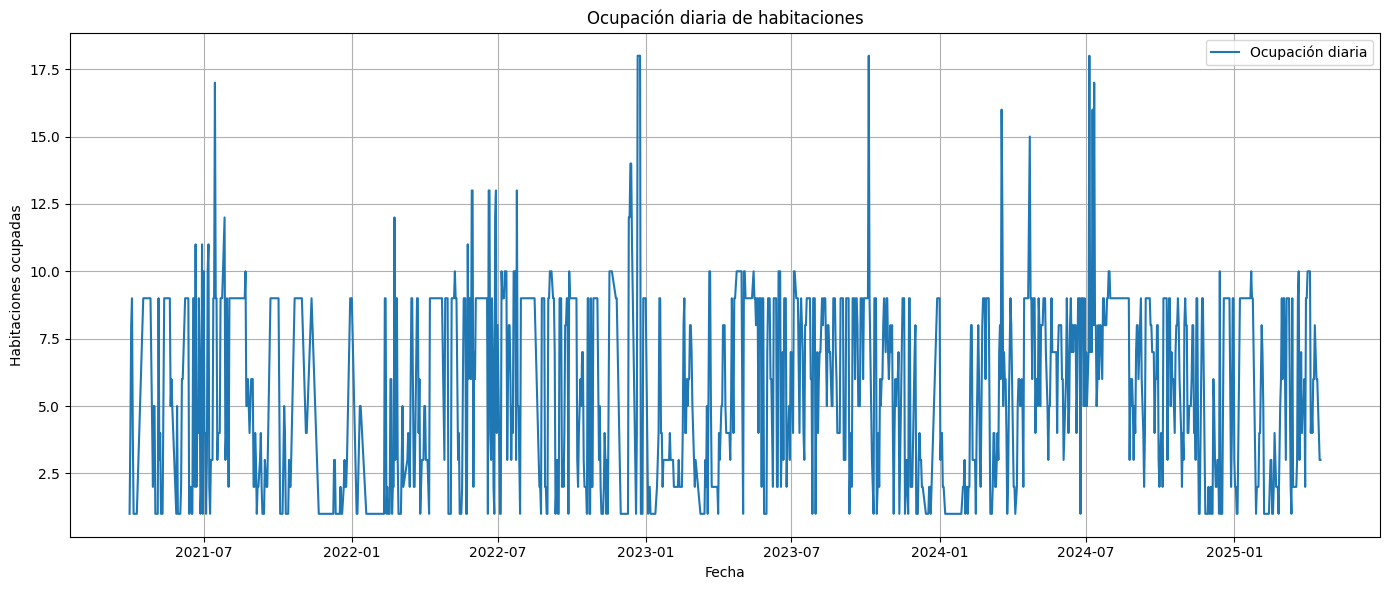

In [14]:


plt.figure(figsize=(14, 6))
plt.plot(ocupacion_por_dia['fecha'], ocupacion_por_dia['habitaciones_ocupadas'], alpha=1, label='Ocupación diaria')


plt.title('Ocupación diaria de habitaciones')
plt.xlabel('Fecha')
plt.ylabel('Habitaciones ocupadas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
ocupacion_por_dia[ocupacion_por_dia['habitaciones_ocupadas'] > 9]

,fecha,habitaciones_ocupadas
56,2021-06-21,11
64,2021-06-29,11
66,2021-07-01,10
71,2021-07-06,10
72,2021-07-07,11
...,...,...
1221,2025-03-22,10
1232,2025-04-02,10
1233,2025-04-03,10
1234,2025-04-04,10


También se observa que la distribución de precios presenta valores anómalos, con precios por noche y por habitación que superan los 1000 €, lo cual no es representativo del alojamiento habitual. Esta desviación se debe a que en el establecimiento también se celebran eventos como bodas o fiestas. Este aspecto será corregido más adelante en el análisis.

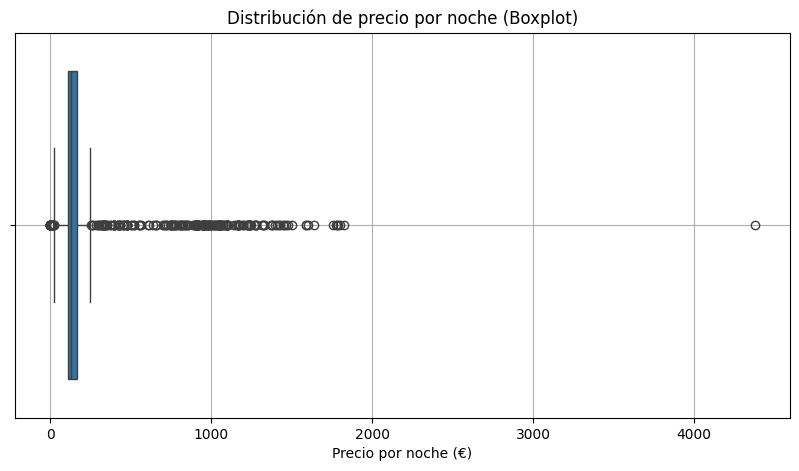

In [16]:

# Crear columna de precio por noche y por habitación
df_habs['precio_por_noche'] = df_habs['Total del pago'] / (df_habs['Duración de la estancia (noches)']*df_habs['Número de habitaciones'])

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_habs['precio_por_noche'])

plt.title('Distribución de precio por noche (Boxplot)')
plt.xlabel('Precio por noche (€)')
plt.grid(True)
plt.show()

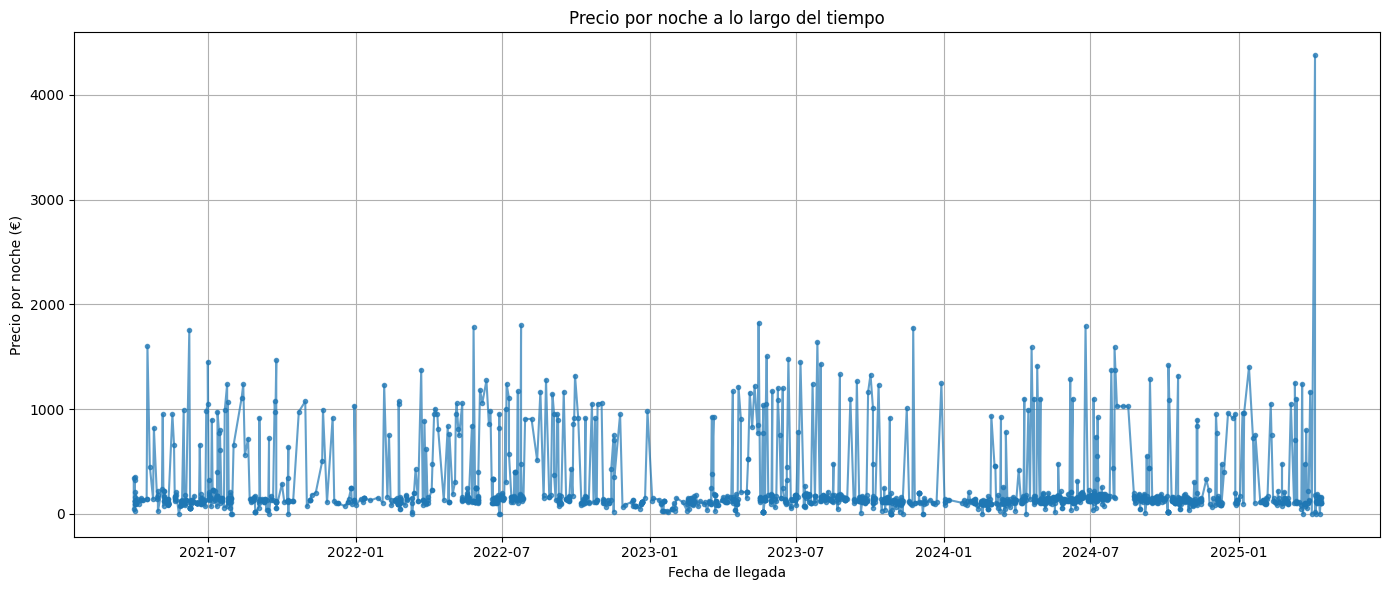

In [17]:


# Ordenar por fecha (opcional pero recomendable)
df = df.sort_values('Fecha de llegada')

plt.figure(figsize=(14, 6))
plt.plot(df_habs['Fecha de llegada'], df_habs['precio_por_noche'], marker='.', linestyle='-', alpha=0.7)

plt.title('Precio por noche a lo largo del tiempo')
plt.xlabel('Fecha de llegada')
plt.ylabel('Precio por noche (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# Q1 (percentil 25) y Q3 (percentil 75)
q1 = df_habs['precio_por_noche'].quantile(0.25)
q3 = df_habs['precio_por_noche'].quantile(0.75)
iqr = q3 - q1

# Límites inferior y superior
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = df_habs[(df_habs['precio_por_noche'] < limite_inferior) | (df_habs['precio_por_noche'] > limite_superior)]

outliers_count = outliers.shape[0]
print(f"Número de outliers encontrados: {outliers_count}")

#outliers

Número de outliers encontrados: 285


Tras analizar los datos junto con la propietaria del negocio, se identifican las causas de los errores detectados y se aplican medidas para corregirlos. En primer lugar, se eliminan las reservas que contienen las habitaciones 'cort' y 'Apartamento 1' ya que corresponden a otros establecimientos y se revisan y ajustan manualmente algunas reservas que han sido identificadas como erróneas, ya sea por tratarse de pruebas internas o por errores en los registros.Además, se eliminan las reservas correspondientes a eventos especiales, aplicando un filtro que conserva únicamente aquellas con un precio por noche y por habitación dentro del rango habitual, es decir, entre 80 € y 170 €.

In [19]:
# 1. Crear una copia del DataFrame con una fila por habitación
df_habs_def = df.copy()
# Eliminar reservas que corresponden a otros establecimientos
df_habs_def = df_habs_def[~df_habs_def['Habitaciones'].str.contains('cort|Apartamento 1', case=False, na=False)]
df_habs_def = df_habs_def[~df_habs_def['Tipos de habitación'].str.contains('CORT MES OLIVERES', case=False, na=False)]
# Solucion datos erroneos: reserva 9 habitaciones+casa entera en realidad es solo casa entera
df_habs_def.loc[df_habs_def['Referencia de la reserva'] == 'LH22110229592853', 'Habitaciones'] = 'Casa 1'
# Solucion datos erroneos: reserva AVIS+casa entera en realidad es AVIS+TIA GLORIA
df_habs_def.loc[df_habs_def['Referencia de la reserva'] == 'LH22111729827688', 'Habitaciones'] = 'AVIS, TIA GLORIA'
# Solucion datos erroneos: eliminación reservas no posibles casa entera (eventos)
ids_a_eliminar = ['LH24071241726719', 'LH24071141703265','LH21071821813545','LH21060421135532','LH21070321579177','LH21051320834182','LH21050720754939','LH22051226366093','LH22050626257088','LH22062727236933','LH22090728621607','LH22092228894491','LH22112129886952','LH23032332062077','LH23050132833599','LH23062934046430','LH24073042139732','LH24032139278940','LH24070641589097','LH22022224946992','LH22041425865282','BBN-BB2108167075931']
df_habs_def = df_habs_def[~df_habs_def['Referencia de la reserva'].isin(ids_a_eliminar)]
# Eliminar reservas falsas hechas por la propietaria
df_habs_def = df_habs_def[~df_habs_def['Nombre del huésped'].isin(['MAGDA','Magda','magda'])]
# Contemplar 'Casa 1'= 9 habitaciones ya que se refiere a la reserva de la casa entera
df_habs_def.loc[df_habs_def['Habitaciones'].str.contains('Casa 1', na=False), 'Habitaciones'] = 'Casa 1'
df_habs_def.loc[df_habs_def['Habitaciones'].str.contains('Casa 1', na=False), 'Número de habitaciones'] = 9
df_habs_def.loc[df_habs_def['Tipos de habitación'].str.contains('CASA ENTERA', na=False), 'Número de habitaciones'] = 9


# 2. Separar las habitaciones por coma y "aplanar" en filas
df_habs_def = df_habs_def.assign(Habitación=df_habs_def['Habitaciones'].str.split(',')).explode('Habitación')
df_habs_def.head()
# 3. Limpiar espacios extra si los hay
df_habs_def['Habitación'] = df_habs_def['Habitación'].str.strip()
# Crear columna de precio por noche y por habitación
df_habs_def['precio_por_noche_hab'] = (df_habs_def['Importe del subtotal (sin impuestos)']) / (df_habs_def['Duración de la estancia (noches)']*df_habs_def['Número de habitaciones'])
# Eliminar reservas con precios fuera del rango ya que se trata de eventos especiales 70-170 €
df_habs_def = df_habs_def[
    (df_habs_def['precio_por_noche_hab'] >= 62) &
    (df_habs_def['precio_por_noche_hab'] <= 198)]
#df_habs_def.tail(20)







In [20]:


ocupacion_diaria = []


for _, row in df_habs_def.iterrows():
    # Saltar si la reserva está cancelada
    if str(row['Estado']).strip().lower() == 'cancelado':
        continue

    # Saltar si no hay habitación
    if pd.isnull(row['Habitación']):
        continue

    habitacion = str(row['Habitación']).strip()


    fecha_ini = row['Fecha de llegada']
    fecha_fin = row['Fecha de salida']

    # Contemplar la habitactión 'casa 1' como 9 habitaciones
    if pd.notnull(fecha_ini) and pd.notnull(fecha_fin):
        dias_estancia = pd.date_range(start=fecha_ini, end=fecha_fin - timedelta(days=1))
        n_habs = 9 if habitacion.lower() == 'casa 1' else 1

        for dia in dias_estancia:
            ocupacion_diaria.append({
                'fecha': dia,
                'habitaciones_ocupadas': n_habs
            })

df_ocupacion = pd.DataFrame(ocupacion_diaria)


ocupacion_por_dia = df_ocupacion.groupby('fecha').sum().reset_index()
ocupacion_por_dia = df_ocupacion.groupby('fecha')['habitaciones_ocupadas'].sum().reset_index()

#Reindexado para tener registro de todos los dias, incluidos los que hay 0 habitaciones ocupadas
# Paso 1: Crear un rango completo de fechas
fecha_inicio = ocupacion_por_dia['fecha'].min()
fecha_fin = ocupacion_por_dia['fecha'].max()
rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin)

# Paso 2: Reindexar para que estén todos los días (incluso los sin ocupación)
ocupacion_por_dia_completo = ocupacion_por_dia.set_index('fecha').reindex(rango_fechas)

# Paso 3: Rellenar los NaN en 'habitaciones_ocupadas' con 0
ocupacion_por_dia_completo['habitaciones_ocupadas'] = ocupacion_por_dia_completo['habitaciones_ocupadas'].fillna(0)

# Paso 4: Opcional: resetear el índice y renombrar la columna de fecha
ocupacion_por_dia_completo = ocupacion_por_dia_completo.reset_index().rename(columns={'index': 'fecha'})



In [21]:
pd.set_option('display.max_rows', None)
(df_habs_def[(df_habs_def['Tarifas de habitación'] == 'LAURA Tarifa Estándar') ])
df_habs_def.to_csv('df_habs_def.csv', index=False)

Una vez corregidos los errores, los datos resultantes presentan coherencia y reflejan con mayor fidelidad la realidad del funcionamiento del negocio.

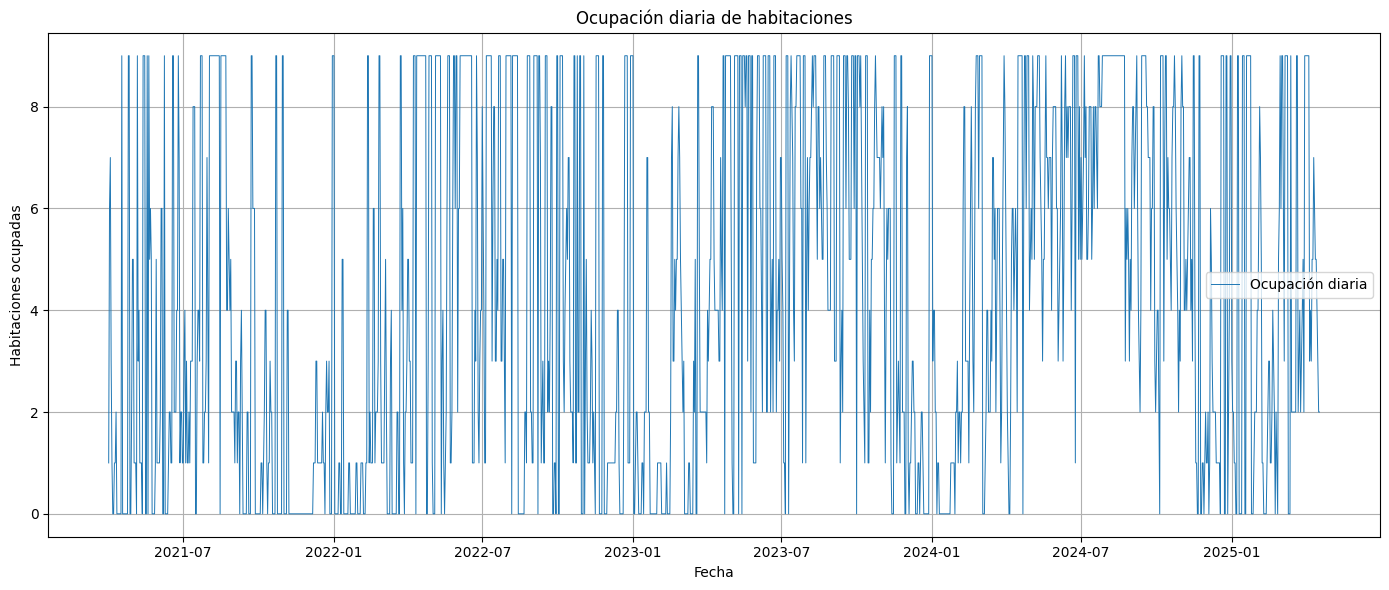

In [22]:


plt.figure(figsize=(14, 6))
plt.plot(ocupacion_por_dia_completo['fecha'], ocupacion_por_dia_completo['habitaciones_ocupadas'], alpha=1, label='Ocupación diaria',lw=0.7)


plt.title('Ocupación diaria de habitaciones')
plt.xlabel('Fecha')
plt.ylabel('Habitaciones ocupadas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

En esta etapa, se procede a la incorporación de variables exógenas al conjunto de datos, las cuales pueden proporcionar información adicional de interés para el análisis.

La primera variable incorporada corresponde al histórico de datos climáticos, previamente extraído mediante técnicas de web scraping. Este conjunto de datos incluye información relativa a la temperatura media diaria y la precipitación registrada cada día.

In [23]:
clima_completo = pd.read_csv('clima_completo.csv', parse_dates=["fecha"])

# Hacer el merge por la columna Fecha
df_final = pd.merge(ocupacion_por_dia_completo, clima_completo, on='fecha', how='left')

df_final['día_semana'] = df_final['fecha'].dt.dayofweek #Columna dia de la semana
df_final['habitaciones_ocupadas'] = df_final['habitaciones_ocupadas'].astype(int)



Asimismo, se decide incorporar el calendario de festivos en Cataluña y también los dias previos a un festivo, dado que la presencia de días no laborables podría influir significativamente en los niveles de ocupación del establecimiento.

In [24]:


# Diccionario de festivos en Cataluña 2021–2025 (ajustado a festivos oficiales comunes)
festivos_cat = {
    # 2021
    date(2021, 1, 1): "Año Nuevo",
    date(2021, 1, 6): "Reyes",
    date(2021, 4, 2): "Viernes Santo",
    date(2021, 4, 5): "Lunes de Pascua",
    date(2021, 5, 1): "Fiesta del Trabajo",
    date(2021, 6, 24): "San Juan",
    date(2021, 8, 15): "Asunción",
    date(2021, 9, 11): "Diada de Cataluña",
    date(2021, 10, 12): "Fiesta Nacional",
    date(2021, 11, 1): "Todos los Santos",
    date(2021, 12, 6): "Día de la Constitución",
    date(2021, 12, 8): "Inmaculada",
    date(2021, 12, 25): "Navidad",
    date(2021, 12, 26): "San Esteban",

    # 2022
    date(2022, 1, 1): "Año Nuevo",
    date(2022, 1, 6): "Reyes",
    date(2022, 4, 15): "Viernes Santo",
    date(2022, 4, 18): "Lunes de Pascua",
    date(2022, 6, 24): "San Juan",
    date(2022, 8, 15): "Asunción",
    date(2022, 9, 11): "Diada de Cataluña",
    date(2022, 10, 12): "Fiesta Nacional",
    date(2022, 11, 1): "Todos los Santos",
    date(2022, 12, 6): "Día de la Constitución",
    date(2022, 12, 8): "Inmaculada",
    date(2022, 12, 25): "Navidad",
    date(2022, 12, 26): "San Esteban",

    # 2023
    date(2023, 1, 1): "Año Nuevo",
    date(2023, 1, 6): "Reyes",
    date(2023, 4, 7): "Viernes Santo",
    date(2023, 4, 10): "Lunes de Pascua",
    date(2023, 5, 1): "Fiesta del Trabajo",
    date(2023, 6, 24): "San Juan",
    date(2023, 8, 15): "Asunción",
    date(2023, 9, 11): "Diada de Cataluña",
    date(2023, 10, 12): "Fiesta Nacional",
    date(2023, 11, 1): "Todos los Santos",
    date(2023, 12, 6): "Día de la Constitución",
    date(2023, 12, 8): "Inmaculada",
    date(2023, 12, 25): "Navidad",
    date(2023, 12, 26): "San Esteban",

    # 2024
    date(2024, 1, 1): "Año Nuevo",
    date(2024, 1, 6): "Reyes",
    date(2024, 3, 29): "Viernes Santo",
    date(2024, 4, 1): "Lunes de Pascua",
    date(2024, 5, 1): "Fiesta del Trabajo",
    date(2024, 6, 24): "San Juan",
    date(2024, 8, 15): "Asunción",
    date(2024, 9, 11): "Diada de Cataluña",
    date(2024, 10, 12): "Fiesta Nacional",
    date(2024, 11, 1): "Todos los Santos",
    date(2024, 12, 6): "Día de la Constitución",
    date(2024, 12, 8): "Inmaculada",
    date(2024, 12, 25): "Navidad",
    date(2024, 12, 26): "San Esteban",

    # 2025
    date(2025, 1, 1): "Año Nuevo",
    date(2025, 1, 6): "Reyes",
    date(2025, 4, 18): "Viernes Santo",
    date(2025, 4, 21): "Lunes de Pascua",
    date(2025, 5, 1): "Fiesta del Trabajo",
    date(2025, 6, 24): "San Juan",
    date(2025, 8, 15): "Asunción",
    date(2025, 9, 11): "Diada de Cataluña",
    date(2025, 10, 12): "Fiesta Nacional",
    date(2025, 11, 1): "Todos los Santos",
    date(2025, 12, 6): "Día de la Constitución",
    date(2025, 12, 8): "Inmaculada",
    date(2025, 12, 25): "Navidad",
    date(2025, 12, 26): "San Esteban",
}

# Añadir columna booleana
df_final['es_festivo'] = df_final['fecha'].isin(festivos_cat)

# Añadir el nombre del festivo (o vacío si no lo es)
df_final['nombre_festivo'] = df_final['fecha'].map(festivos_cat).fillna('')

# Crear columna con la fecha del día siguiente
df_final['dia_siguiente'] = df_final['fecha'] + pd.Timedelta(days=1)

# Marcar si el día siguiente es festivo => por tanto, la fecha actual es víspera
df_final['es_vispera_festivo'] = df_final['dia_siguiente'].isin(df_final[df_final['es_festivo'] == True]['fecha'])

# Eliminar la columna auxiliar si no la necesitas
df_final.drop(columns=['dia_siguiente'], inplace=True)


/tmp/ipython-input-2517180931.py:84: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_final['es_festivo'] = df_final['fecha'].isin(festivos_cat)


Además, se añade el calendario de vacaciones escolares, dado que el establecimiento atrae en gran medida a una clientela de perfil familiar, lo que podría tener un impacto relevante en la demanda durante dichos períodos.

In [25]:


# Definir los períodos de vacaciones como listas de tuplas (inicio, fin)
vacaciones = [
    # Verano
    (datetime(2022, 6, 22), datetime(2022, 9, 4)),
    (datetime(2023, 6, 23), datetime(2023, 9, 5)),
    (datetime(2024, 6, 22), datetime(2024, 9, 8)),
    (datetime(2025, 6, 21), datetime(2025, 9, 7)),
    # Navidad
    (datetime(2021, 12, 23), datetime(2022, 1, 7)),
    (datetime(2022, 12, 22), datetime(2023, 1, 8)),
    (datetime(2023, 12, 21), datetime(2024, 1, 7)),
    (datetime(2024, 12, 21), datetime(2025, 1, 7)),
    # Semana Santa
    (datetime(2022, 4, 11), datetime(2022, 4, 18)),
    (datetime(2023, 4, 3), datetime(2023, 4, 10)),
    (datetime(2024, 3, 25), datetime(2024, 4, 1)),
    (datetime(2025, 4, 12), datetime(2025, 4, 21)),
]

# Función para verificar si una fecha está en vacaciones
def es_vacaciones(fecha):
    return any(inicio <= fecha <= fin for inicio, fin in vacaciones)

# Aplicar la función al DataFrame
df_final['es_vacaciones'] = df_final['fecha'].apply(es_vacaciones)


A continuación, se incorpora el historial de eventos relevantes celebrados en las proximidades del establecimiento, los cuales pueden incrementar significativamente la afluencia turística. Este conjunto incluye acontecimientos culturales, deportivos, festivales y celebraciones populares.

In [26]:


# Lista de eventos con sus rangos de fechas
eventos = [
    {"evento": "Primavera Sound", "inicio": "2021-06-02", "fin": "2021-06-06"},
    {"evento": "Primavera Sound", "inicio": "2022-06-02", "fin": "2022-06-12"},
    {"evento": "Primavera Sound", "inicio": "2023-05-29", "fin": "2023-06-04"},
    {"evento": "Primavera Sound", "inicio": "2024-05-29", "fin": "2024-06-02"},
    {"evento": "Primavera Sound", "inicio": "2025-06-04", "fin": "2025-06-08"},


    {"evento": "Sónar", "inicio": "2022-06-16", "fin": "2022-06-18"},
    {"evento": "Sónar", "inicio": "2023-06-15", "fin": "2023-06-17"},
    {"evento": "Sónar", "inicio": "2024-06-13", "fin": "2024-06-15"},
    {"evento": "Sónar", "inicio": "2025-06-12", "fin": "2025-06-14"},

    {"evento": "Cruïlla", "inicio": "2021-07-08", "fin": "2021-07-11"},
    {"evento": "Cruïlla", "inicio": "2022-07-06", "fin": "2022-07-09"},
    {"evento": "Cruïlla", "inicio": "2023-07-05", "fin": "2023-07-08"},
    {"evento": "Cruïlla", "inicio": "2024-07-10", "fin": "2024-07-13"},
    {"evento": "Cruïlla", "inicio": "2025-07-09", "fin": "2025-07-12"},

    {"evento": "Barcelona Rock Fest", "inicio": "2021-07-01", "fin": "2021-07-03"},
    {"evento": "Barcelona Rock Fest", "inicio": "2022-06-30", "fin": "2022-07-02"},
    {"evento": "Barcelona Rock Fest", "inicio": "2024-07-05", "fin": "2024-07-07"},
    {"evento": "Barcelona Rock Fest", "inicio": "2025-06-25", "fin": "2025-06-28"},

    {"evento": "Mobile World Congress", "inicio": "2021-06-28", "fin": "2021-07-01"},
    {"evento": "Mobile World Congress", "inicio": "2022-02-28", "fin": "2022-03-03"},
    {"evento": "Mobile World Congress", "inicio": "2023-02-27", "fin": "2023-03-02"},
    {"evento": "Mobile World Congress", "inicio": "2024-02-26", "fin": "2024-02-29"},
    {"evento": "Mobile World Congress", "inicio": "2025-03-03", "fin": "2025-03-06"},

    {"evento": "La Mercè", "inicio": "2021-09-23", "fin": "2021-09-26"},
    {"evento": "La Mercè", "inicio": "2022-09-23", "fin": "2022-09-26"},
    {"evento": "La Mercè", "inicio": "2023-09-22", "fin": "2023-09-25"},
    {"evento": "La Mercè", "inicio": "2024-09-20", "fin": "2024-09-24"},
    {"evento": "La Mercè", "inicio": "2025-09-19", "fin": "2025-09-24"},

    {"evento": "Carnaval", "inicio": "2021-02-11", "fin": "2021-02-17"},
    {"evento": "Carnaval", "inicio": "2022-02-24", "fin": "2022-03-02"},
    {"evento": "Carnaval", "inicio": "2023-02-16", "fin": "2023-02-22"},
    {"evento": "Carnaval", "inicio": "2024-02-08", "fin": "2024-02-14"},
    {"evento": "Carnaval", "inicio": "2025-02-27", "fin": "2025-03-05"},

    {"evento": "Salón Náutico Internacional", "inicio": "2021-10-12", "fin": "2021-10-17"},
    {"evento": "Salón Náutico Internacional", "inicio": "2022-10-12", "fin": "2022-10-16"},
    {"evento": "Salón Náutico Internacional", "inicio": "2023-10-11", "fin": "2023-10-15"},
    {"evento": "Salón Náutico Internacional", "inicio": "2024-10-10", "fin": "2024-10-13"},
    {"evento": "Salón Náutico Internacional", "inicio": "2025-10-08", "fin": "2025-10-12"},

    {"evento": "Llum BCN", "inicio": "2021-11-05", "fin": "2021-11-07"},
    {"evento": "Llum BCN", "inicio": "2022-02-04", "fin": "2022-02-06"},
    {"evento": "Llum BCN", "inicio": "2023-02-03", "fin": "2023-02-05"},
    {"evento": "Llum BCN", "inicio": "2024-02-02", "fin": "2024-02-04"},
    {"evento": "Llum BCN", "inicio": "2025-02-07", "fin": "2025-02-09"},

    {"evento": "Trial Indoor Barcelona", "inicio": "2021-11-21", "fin": "2021-11-21"},
    {"evento": "Trial Indoor Barcelona", "inicio": "2022-04-10", "fin": "2022-04-10"},
    {"evento": "Trial Indoor Barcelona", "inicio": "2023-02-05", "fin": "2023-02-05"},
    {"evento": "Trial Indoor Barcelona", "inicio": "2024-02-04", "fin": "2024-02-04"},
    {"evento": "Trial Indoor Barcelona", "inicio": "2025-02-02", "fin": "2025-02-02"},

    {"evento": "BCNegra", "inicio": "2021-01-21", "fin": "2021-01-31"},
    {"evento": "BCNegra", "inicio": "2022-02-03", "fin": "2022-02-13"},
    {"evento": "BCNegra", "inicio": "2023-02-06", "fin": "2023-02-12"},
    {"evento": "BCNegra", "inicio": "2024-02-05", "fin": "2024-02-11"},
    {"evento": "BCNegra", "inicio": "2025-02-10", "fin": "2025-02-16"},

    {"evento": "Brunch Electronik", "inicio": "2021-08-07", "fin": "2021-08-10"},
    {"evento": "Brunch Electronik", "inicio": "2022-08-07", "fin": "2022-08-10"},
    {"evento": "Brunch Electronik", "inicio": "2023-08-11", "fin": "2023-08-13"},
    {"evento": "Brunch Electronik", "inicio": "2024-08-09", "fin": "2024-08-11"},
    {"evento": "Brunch Electronik", "inicio": "2025-08-07", "fin": "2025-08-10"},

    {"evento": "CSIO Barcelona", "inicio": "2021-10-01", "fin": "2021-10-03"},
    {"evento": "CSIO Barcelona", "inicio": "2022-09-29", "fin": "2022-10-02"},
    {"evento": "CSIO Barcelona", "inicio": "2023-09-28", "fin": "2023-10-01"},
    {"evento": "CSIO Barcelona", "inicio": "2024-10-03", "fin": "2024-10-06"},
    {"evento": "CSIO Barcelona", "inicio": "2025-10-02", "fin": "2025-10-05"},

    {"evento": "Festival de Cine de Sitges", "inicio": "2022-10-07", "fin": "2022-10-17"},
    {"evento": "Festival de Cine de Sitges", "inicio": "2022-10-06", "fin": "2022-10-16"},
    {"evento": "Festival de Cine de Sitges", "inicio": "2023-10-05", "fin": "2023-10-15"},
    {"evento": "Festival de Cine de Sitges", "inicio": "2024-10-03", "fin": "2024-10-13"},
    {"evento": "Festival de Cine de Sitges", "inicio": "2025-10-09", "fin": "2025-10-19"},

    {"evento": "Fórmula 1 GP España", "inicio": "2021-05-07", "fin": "2021-05-09"},
    {"evento": "Fórmula 1 GP España", "inicio": "2022-05-20", "fin": "2022-05-22"},
    {"evento": "Fórmula 1 GP España", "inicio": "2023-06-02", "fin": "2023-06-04"},
    {"evento": "Fórmula 1 GP España", "inicio": "2024-06-21", "fin": "2024-06-23"},
    {"evento": "Fórmula 1 GP España", "inicio": "2025-05-30", "fin": "2025-06-01"},

    {"evento": "Maratón de Barcelona", "inicio": "2021-05-07", "fin": "2021-05-07"},
    {"evento": "Maratón de Barcelona", "inicio": "2022-05-08", "fin": "2022-05-08"},
    {"evento": "Maratón de Barcelona", "inicio": "2023-03-19", "fin": "2023-03-19"},
    {"evento": "Maratón de Barcelona", "inicio": "2024-03-10", "fin": "2024-03-10"},
    {"evento": "Maratón de Barcelona", "inicio": "2025-03-16", "fin": "2025-03-16"},


    {"evento": "MotoGP GP Catalunya", "inicio": "2021-06-04", "fin": "2021-06-06"},
    {"evento": "MotoGP GP Catalunya", "inicio": "2022-06-03", "fin": "2022-06-05"},
    {"evento": "MotoGP GP Catalunya", "inicio": "2023-09-01", "fin": "2023-09-03"},
    {"evento": "MotoGP GP Catalunya", "inicio": "2024-05-24", "fin": "2024-05-26"},
    {"evento": "MotoGP GP Catalunya", "inicio": "2025-09-05", "fin": "2025-09-07"},



]


df_eventos = pd.DataFrame(eventos)
df_eventos["inicio"] = pd.to_datetime(df_eventos["inicio"])
df_eventos["fin"] = pd.to_datetime(df_eventos["fin"])



In [27]:


# Inicializar columna 'evento' como None
df_final["evento"] = None

# Asignar evento si la fecha cae dentro del rango de alguno
for _, row in df_eventos.iterrows():
    mask = (df_final["fecha"] >= row["inicio"]) & (df_final["fecha"] <= row["fin"])
    df_final.loc[mask, "evento"] = row["evento"]


Se decide incorporar una nueva variable que refleje la antelación media con la que se han efectuado las reservas para cada día. Esta métrica puede aportar información relevante sobre el comportamiento de la demanda, facilitando la identificación de patrones de reserva anticipada y su relación con la ocupación.

In [28]:


# Paso 1: Crear columna con la antelación en días
df_habs_def['antelacion_dias'] = (df_habs_def['Fecha de llegada'] - df_habs_def['Reservada']).dt.days
df_habs_def['antelacion_dias'] = df_habs_def['antelacion_dias'].clip(lower=0)
# Paso 2: Calcular la media diaria de antelación por 'Fecha de llegada'
media_antelacion = (
    df_habs_def.groupby('Fecha de llegada')['antelacion_dias']
    .mean()
    .reset_index()
    .rename(columns={'antelacion_dias': 'media_antelacion_dias', 'Fecha de llegada': 'fecha'})
)

# Paso 3: Unir la media al dataframe original
df_final = df_final.merge(media_antelacion, on='fecha', how='left')




Se contempla también el número de reservas canceladas por fecha de llegada

In [29]:
# Contar número de reservas canceladas por fecha de llegada
cancelaciones = (
    df_habs_def[df_habs_def['Estado'] == 'Cancelada']
    .groupby('Fecha de llegada')
    .size()
    .reset_index(name='num_cancelaciones')
    .rename(columns={'Fecha de llegada': 'fecha'})
)

# Unir con el dataframe original
df_final = df_final.merge(cancelaciones, on='fecha', how='left')

# Rellenar con 0 donde no haya cancelaciones
df_final['num_cancelaciones'] = df_final['num_cancelaciones'].fillna(0).astype(int)



In [30]:
#df_habs_def[df_habs_def['Fecha de llegada']==datetime(2021,4,5)]


Se añade la duración media diaria de las estancias

In [31]:
# Calcular estancia por reserva primero
df_habs_def['estancia_dias'] = (df_habs_def['Fecha de salida'] - df_habs_def['Fecha de llegada']).dt.days

# Agrupar por fecha de llegada para obtener la estancia media
estancia_media = (
    df_habs_def.groupby('Fecha de llegada')['estancia_dias']
    .mean()
    .reset_index(name='estancia_media_dias')
    .rename(columns={'Fecha de llegada': 'fecha'})
)

# Unir al dataframe original
df_final = df_final.merge(estancia_media, on='fecha', how='left')

Es importante considerar que el negocio se encuentra en una etapa de crecimiento, evidenciado por un incremento anual tanto en el número de reservas como en los precios. Esta evolución sugiere la presencia de tendencias temporales que pueden influir significativamente en el comportamiento de la demanda y en la evolución de los precios. Por este motivo, se incorporan las variables 'año_llegada' y 'mes_llegada', con el fin de capturar dichos patrones temporales y permitir su análisis dentro del modelo predictivo.

In [32]:
df_final['año_llegada'] = df_final['fecha'].dt.year
df_final['mes_llegada'] = df_final['fecha'].dt.month


A continuación se muestra una parte del dataframe que se va a tratar.

In [33]:

df_final.to_csv('df_final.csv', index=False)


In [34]:
df_final.head(10)

,fecha,habitaciones_ocupadas,temp_media,precipitacion,día_semana,es_festivo,nombre_festivo,es_vispera_festivo,es_vacaciones,evento,media_antelacion_dias,num_cancelaciones,estancia_media_dias,año_llegada,mes_llegada
0,2021-04-01,1,14.94,0.0,3,False,,True,False,None,14.0,0,3.0,2021,4
1,2021-04-02,6,16.20,0.0,4,True,Viernes Santo,False,False,None,14.0,0,2.2,2021,4
2,2021-04-03,7,16.40,0.4,5,False,,False,False,None,43.0,0,2.0,2021,4
3,2021-04-04,3,14.47,0.0,6,False,,True,False,None,16.0,0,2.0,2021,4
4,2021-04-05,1,14.75,0.0,0,True,Lunes de Pascua,False,False,None,NaN,0,NaN,2021,4
5,2021-04-06,0,13.52,0.2,1,False,,False,False,None,NaN,0,NaN,2021,4
6,2021-04-07,0,10.36,0.8,2,False,,False,False,None,NaN,0,NaN,2021,4
7,2021-04-08,1,12.41,0.0,3,False,,False,False,None,3.0,0,1.0,2021,4
8,2021-04-09,1,12.55,0.0,4,False,,False,False,None,23.0,0,2.0,2021,4
9,2021-04-10,2,12.76,2.2,5,False,,False,False,None,0.0,0,1.0,2021,4
